In [1]:
##Import all necessary packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.formula.api import ols #For n-way ANOVA
from statsmodels.stats.anova import _get_covariance, anova_lm #for n-way ANOVA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans 

from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
#Import dataset and store in variable called df

df = pd.read_csv("Social Media Data for DSBA.csv")

In [3]:
# Display first 5 rows of the dataset

df.head().T

,0,1,2,3,4
UserID,1000001,1000002,1000003,1000004,1000005
Taken_product,Yes,No,Yes,No,No
Yearly_avg_view_on_travel_page,307.0,367.0,277.0,247.0,202.0
preferred_device,iOS and Android,iOS,iOS and Android,iOS,iOS and Android
total_likes_on_outstation_checkin_given,38570.0,9765.0,48055.0,48720.0,20685.0
yearly_avg_Outstation_checkins,1,1,1,1,1
member_in_family,2,1,2,4,1
preferred_location_type,Financial,Financial,Other,Financial,Medical
Yearly_avg_comment_on_travel_page,94.0,61.0,92.0,56.0,40.0
total_likes_on_outofstation_checkin_received,5993,5130,2090,2909,3468


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   UserID                                        11760 non-null  int64  
 1   Taken_product                                 11760 non-null  object 
 2   Yearly_avg_view_on_travel_page                11179 non-null  float64
 3   preferred_device                              11707 non-null  object 
 4   total_likes_on_outstation_checkin_given       11379 non-null  float64
 5   yearly_avg_Outstation_checkins                11685 non-null  object 
 6   member_in_family                              11760 non-null  object 
 7   preferred_location_type                       11729 non-null  object 
 8   Yearly_avg_comment_on_travel_page             11554 non-null  float64
 9   total_likes_on_outofstation_checkin_received  11760 non-null 

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
UserID,11760.0,1.005880e+06,3394.963917,1000001.0,1002940.75,1005880.5,1008820.25,1011760.0
Yearly_avg_view_on_travel_page,11179.0,2.808308e+02,68.182958,35.0,232.00,271.0,324.00,464.0
total_likes_on_outstation_checkin_given,11379.0,2.817048e+04,14385.032134,3570.0,16380.00,28076.0,40525.00,252430.0
Yearly_avg_comment_on_travel_page,11554.0,7.479003e+01,24.026650,3.0,57.00,75.0,92.00,815.0
total_likes_on_outofstation_checkin_received,11760.0,6.531699e+03,4706.613785,1009.0,2940.75,4948.0,8393.25,20065.0
week_since_last_outstation_checkin,11760.0,3.203571e+00,2.616365,0.0,1.00,3.0,5.00,11.0
montly_avg_comment_on_company_page,11760.0,2.866156e+01,48.660504,11.0,17.00,22.0,27.00,500.0
travelling_network_rating,11760.0,2.712245e+00,1.080887,1.0,2.00,3.0,4.00,4.0
Adult_flag,11760.0,7.938776e-01,0.851823,0.0,0.00,1.0,1.00,3.0
Daily_Avg_mins_spend_on_traveling_page,11760.0,1.381743e+01,9.070657,0.0,8.00,12.0,18.00,270.0


In [6]:
df.describe(include=["object","category"]).T

,count,unique,top,freq
Taken_product,11760,2,No,9864
preferred_device,11707,10,Tab,4172
yearly_avg_Outstation_checkins,11685,30,1,4543
member_in_family,11760,7,3,4561
preferred_location_type,11729,15,Beach,2424
following_company_page,11657,4,No,8355
working_flag,11760,2,No,9952


In [7]:
df.isnull().sum()

UserID                                            0
Taken_product                                     0
Yearly_avg_view_on_travel_page                  581
preferred_device                                 53
total_likes_on_outstation_checkin_given         381
yearly_avg_Outstation_checkins                   75
member_in_family                                  0
preferred_location_type                          31
Yearly_avg_comment_on_travel_page               206
total_likes_on_outofstation_checkin_received      0
week_since_last_outstation_checkin                0
following_company_page                          103
montly_avg_comment_on_company_page                0
working_flag                                      0
travelling_network_rating                         0
Adult_flag                                        0
Daily_Avg_mins_spend_on_traveling_page            0
dtype: int64

In [8]:
# unique values display

for i in df.columns:
    if df[i].dtype == 'object':
        print(i)
        print(df[i].unique()) 
        print()

Taken_product
['Yes' 'No']

preferred_device
['iOS and Android' 'iOS' 'ANDROID' nan 'Android' 'Android OS' 'Other'
 'Others' 'Tab' 'Laptop' 'Mobile']

yearly_avg_Outstation_checkins
['1' '24' '23' '27' '16' '15' '26' '19' '21' '11' '10' '25' '12' '18' '29'
 nan '22' '14' '20' '28' '17' '13' '*' '5' '8' '2' '3' '9' '7' '6' '4']

member_in_family
['2' '1' '4' 'Three' '3' '5' '10']

preferred_location_type
['Financial' 'Other' 'Medical' nan 'Game' 'Social media' 'Entertainment'
 'Tour and Travel' 'Movie' 'OTT' 'Tour  Travel' 'Beach' 'Historical site'
 'Big Cities' 'Trekking' 'Hill Stations']

following_company_page
['Yes' 'No' nan '1' '0']

working_flag
['No' 'Yes']



In [9]:
# Cleaning the wrong value

In [10]:
df['yearly_avg_Outstation_checkins'] = df['yearly_avg_Outstation_checkins'].replace('*',np.nan)

In [11]:
df['member_in_family'] = df['member_in_family'].replace('Three','3')

In [12]:
df['following_company_page'] = df['following_company_page'].replace('Yes','1')
df['following_company_page'] = df['following_company_page'].replace('No','0')

In [13]:
df['Taken_product'] = df['Taken_product'].replace('Yes','1')
df['Taken_product'] = df['Taken_product'].replace('No','0')

In [14]:
df['working_flag'] = df['working_flag'].replace('Yes','1')
df['working_flag'] = df['working_flag'].replace('No','0')

In [15]:
df['preferred_location_type'] = df['preferred_location_type'].replace('Tour  Travel','Tour and Travel')
df['preferred_location_type'] = df['preferred_location_type'].replace('Game','Entertainment')
df['preferred_location_type'] = df['preferred_location_type'].replace('Movie','Entertainment')

In [16]:
for i in df.columns:
    if df[i].dtype == 'object':
        print(i)
        print(df[i].unique()) 
        print()       

Taken_product
['1' '0']

preferred_device
['iOS and Android' 'iOS' 'ANDROID' nan 'Android' 'Android OS' 'Other'
 'Others' 'Tab' 'Laptop' 'Mobile']

yearly_avg_Outstation_checkins
['1' '24' '23' '27' '16' '15' '26' '19' '21' '11' '10' '25' '12' '18' '29'
 nan '22' '14' '20' '28' '17' '13' '5' '8' '2' '3' '9' '7' '6' '4']

member_in_family
['2' '1' '4' '3' '5' '10']

preferred_location_type
['Financial' 'Other' 'Medical' nan 'Entertainment' 'Social media'
 'Tour and Travel' 'OTT' 'Beach' 'Historical site' 'Big Cities' 'Trekking'
 'Hill Stations']

following_company_page
['1' '0' nan]

working_flag
['0' '1']



In [17]:
df['Adult_flag'] = df['Adult_flag'].replace(1,0)
df['Adult_flag'] = df['Adult_flag'].replace(2,1)
df['Adult_flag'] = df['Adult_flag'].replace(3,1)

In [18]:
df['Adult_flag'].unique()

array([0, 1], dtype=int64)

In [19]:
# checking for duplicates

dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [20]:
# replacing nan values 

In [21]:
df['preferred_location_type'] = df['preferred_location_type'].replace(np.nan,df['preferred_location_type'].mode()[0])

In [22]:
df['preferred_location_type'].unique()

array(['Financial', 'Other', 'Medical', 'Beach', 'Entertainment',
       'Social media', 'Tour and Travel', 'OTT', 'Historical site',
       'Big Cities', 'Trekking', 'Hill Stations'], dtype=object)

In [23]:
df['yearly_avg_Outstation_checkins'] = df['yearly_avg_Outstation_checkins'].replace(np.nan,df['yearly_avg_Outstation_checkins'].mode()[0])

In [24]:
df['yearly_avg_Outstation_checkins'].unique()

array(['1', '24', '23', '27', '16', '15', '26', '19', '21', '11', '10',
       '25', '12', '18', '29', '22', '14', '20', '28', '17', '13', '5',
       '8', '2', '3', '9', '7', '6', '4'], dtype=object)

In [25]:
df['following_company_page'] = df['following_company_page'].replace(np.nan,df['following_company_page'].mode()[0])

In [26]:
df['following_company_page'].unique()

array(['1', '0'], dtype=object)

In [27]:
df['preferred_device'] = df['preferred_device'].replace(np.nan,df['preferred_device'].mode()[0])

In [28]:
# renaming the other types to Mobile

In [29]:
df['preferred_device'] = df['preferred_device'].replace("iOS and Android","Mobile")
df['preferred_device'] = df['preferred_device'].replace("iOS","Mobile")
df['preferred_device'] = df['preferred_device'].replace("ANDROID","Mobile")
df['preferred_device'] = df['preferred_device'].replace("Tab","Mobile")
df['preferred_device'] = df['preferred_device'].replace("Android","Mobile")
df['preferred_device'] = df['preferred_device'].replace("Android OS","Mobile")
df['preferred_device'] = df['preferred_device'].replace("Other","Mobile")
df['preferred_device'] = df['preferred_device'].replace("Others","Mobile")

In [30]:
df['preferred_device'].unique()

array(['Mobile', 'Laptop'], dtype=object)

In [31]:
# coverting data types

In [32]:
df['Adult_flag'] = pd.Categorical(df['Adult_flag'])
df['Taken_product'] = pd.Categorical(df['Taken_product'])
df['member_in_family'] = pd.Categorical(df['member_in_family'])
df['following_company_page'] = pd.Categorical(df['following_company_page'])
df['working_flag'] = pd.Categorical(df['working_flag'])

In [33]:
df['yearly_avg_Outstation_checkins'] = df['yearly_avg_Outstation_checkins'].astype(int)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   UserID                                        11760 non-null  int64   
 1   Taken_product                                 11760 non-null  category
 2   Yearly_avg_view_on_travel_page                11179 non-null  float64 
 3   preferred_device                              11760 non-null  object  
 4   total_likes_on_outstation_checkin_given       11379 non-null  float64 
 5   yearly_avg_Outstation_checkins                11760 non-null  int32   
 6   member_in_family                              11760 non-null  category
 7   preferred_location_type                       11760 non-null  object  
 8   Yearly_avg_comment_on_travel_page             11554 non-null  float64 
 9   total_likes_on_outofstation_checkin_received  1176

In [35]:
#dropping the unnecessary variable
#We drop UserID from the dataset as it doesn't contribute to our analysis

df = df.drop('UserID',axis=1)

In [36]:
# checking null values

In [37]:
df.isnull().sum()

Taken_product                                     0
Yearly_avg_view_on_travel_page                  581
preferred_device                                  0
total_likes_on_outstation_checkin_given         381
yearly_avg_Outstation_checkins                    0
member_in_family                                  0
preferred_location_type                           0
Yearly_avg_comment_on_travel_page               206
total_likes_on_outofstation_checkin_received      0
week_since_last_outstation_checkin                0
following_company_page                            0
montly_avg_comment_on_company_page                0
working_flag                                      0
travelling_network_rating                         0
Adult_flag                                        0
Daily_Avg_mins_spend_on_traveling_page            0
dtype: int64

In [38]:
df['Yearly_avg_view_on_travel_page'] = df['Yearly_avg_view_on_travel_page'].replace(np.nan,df['Yearly_avg_view_on_travel_page'].median())
df['total_likes_on_outstation_checkin_given'] = df['total_likes_on_outstation_checkin_given'].replace(np.nan,df['total_likes_on_outstation_checkin_given'].median())
df['Yearly_avg_comment_on_travel_page'] = df['Yearly_avg_comment_on_travel_page'].replace(np.nan,df['Yearly_avg_comment_on_travel_page'].median())

In [39]:
df.isnull().sum()

Taken_product                                   0
Yearly_avg_view_on_travel_page                  0
preferred_device                                0
total_likes_on_outstation_checkin_given         0
yearly_avg_Outstation_checkins                  0
member_in_family                                0
preferred_location_type                         0
Yearly_avg_comment_on_travel_page               0
total_likes_on_outofstation_checkin_received    0
week_since_last_outstation_checkin              0
following_company_page                          0
montly_avg_comment_on_company_page              0
working_flag                                    0
travelling_network_rating                       0
Adult_flag                                      0
Daily_Avg_mins_spend_on_traveling_page          0
dtype: int64

In [40]:
#Univariate Analysis

In [41]:
#Numeric variables

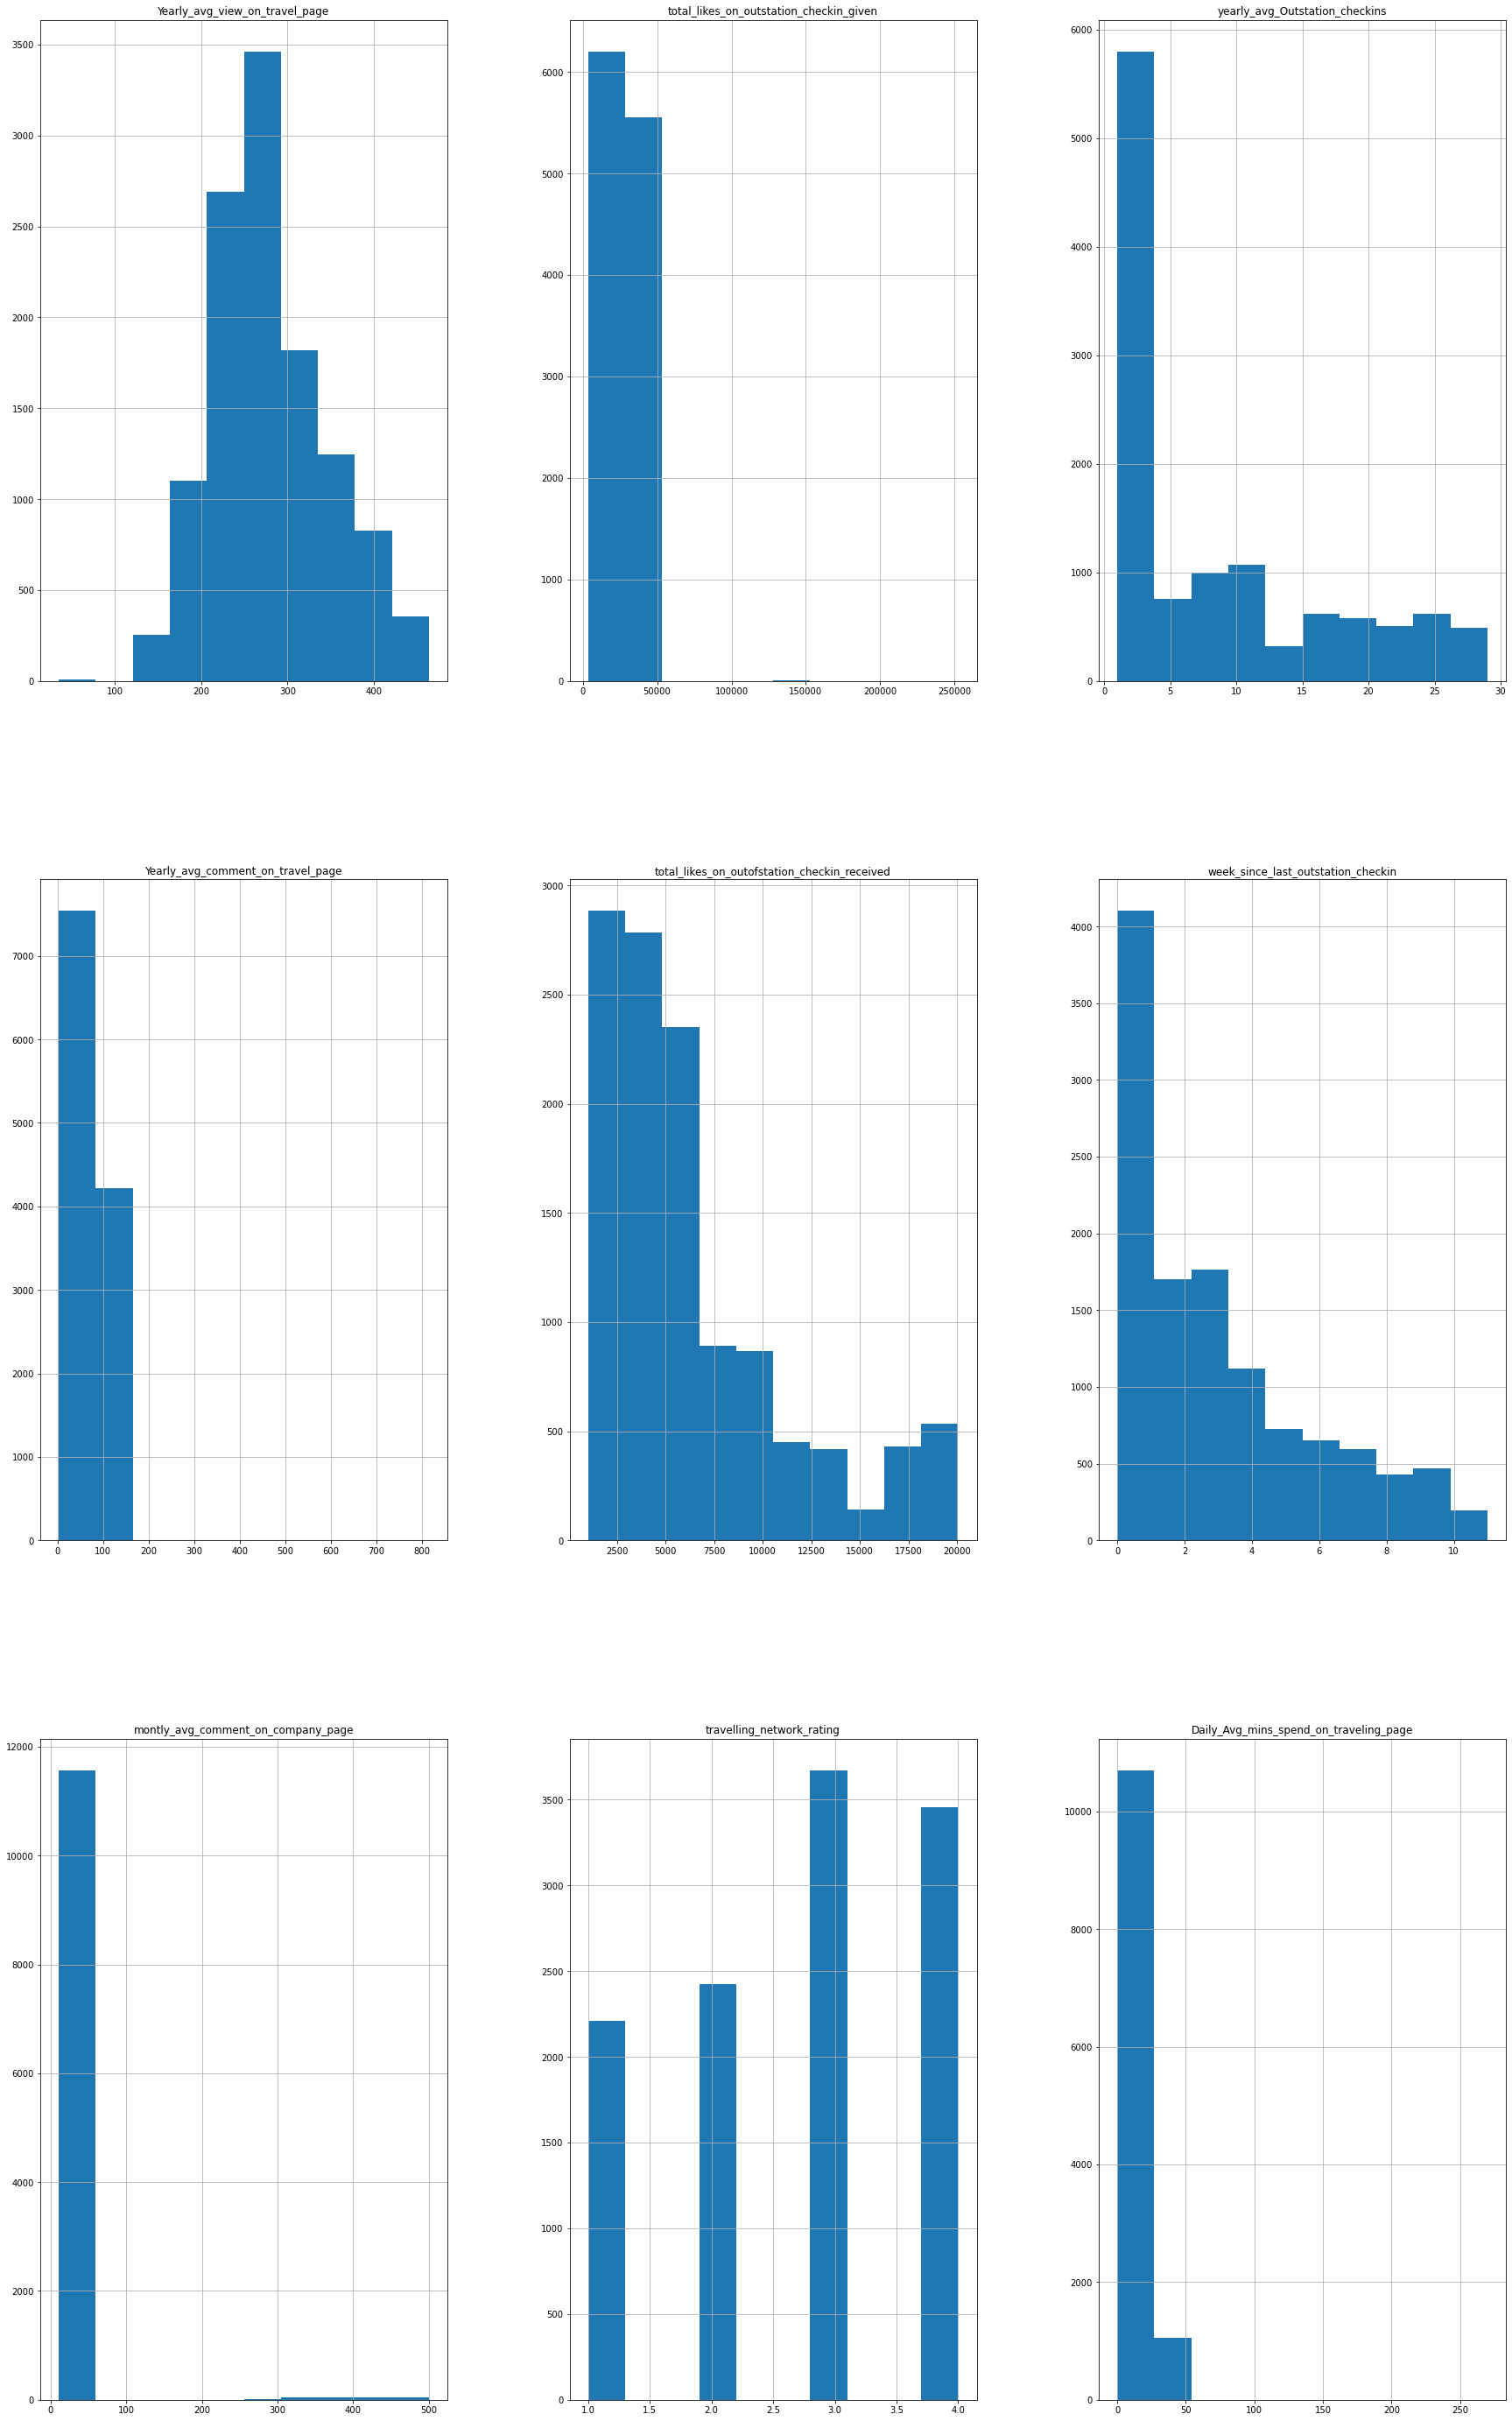

In [42]:
df.hist(column = df.columns, figsize=(30,50));

In [43]:
df.columns

Index(['Taken_product', 'Yearly_avg_view_on_travel_page', 'preferred_device',
       'total_likes_on_outstation_checkin_given',
       'yearly_avg_Outstation_checkins', 'member_in_family',
       'preferred_location_type', 'Yearly_avg_comment_on_travel_page',
       'total_likes_on_outofstation_checkin_received',
       'week_since_last_outstation_checkin', 'following_company_page',
       'montly_avg_comment_on_company_page', 'working_flag',
       'travelling_network_rating', 'Adult_flag',
       'Daily_Avg_mins_spend_on_traveling_page'],
      dtype='object')

In [44]:
# Measure the skeweness of the required columns
Skewness = pd.DataFrame({'Skewness' : [stats.skew(df.Yearly_avg_view_on_travel_page),stats.skew(df.total_likes_on_outstation_checkin_given),
                                       stats.skew(df.yearly_avg_Outstation_checkins),stats.skew(df.Yearly_avg_comment_on_travel_page),
                                       stats.skew(df.total_likes_on_outofstation_checkin_received),stats.skew(df.week_since_last_outstation_checkin),
                                       stats.skew(df.montly_avg_comment_on_company_page),
                                      stats.skew(df.travelling_network_rating),
                                      stats.skew(df.Daily_Avg_mins_spend_on_traveling_page)]},
                        index=['Yearly_avg_view_on_travel_page', 'total_likes_on_outstation_checkin_given', 
                               'yearly_avg_Outstation_checkins', 'Yearly_avg_comment_on_travel_page', 
                               'total_likes_on_outofstation_checkin_received', 'week_since_last_outstation_checkin',
                               'montly_avg_comment_on_company_page', 'travelling_network_rating',
                               'Daily_Avg_mins_spend_on_traveling_page'])  

Skewness

,Skewness
Yearly_avg_view_on_travel_page,0.446079
total_likes_on_outstation_checkin_given,0.498350
yearly_avg_Outstation_checkins,0.977120
Yearly_avg_comment_on_travel_page,4.910321
total_likes_on_outofstation_checkin_received,1.368404
week_since_last_outstation_checkin,0.915217
montly_avg_comment_on_company_page,7.683170
travelling_network_rating,-0.302518
Daily_Avg_mins_spend_on_traveling_page,4.480111


In [45]:
# categorical variable

<AxesSubplot:xlabel='travelling_network_rating', ylabel='count'>

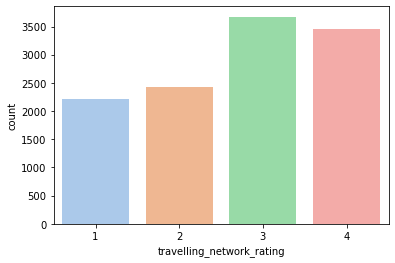

In [46]:
sns.countplot(x='travelling_network_rating', data=df, palette='pastel')

<AxesSubplot:xlabel='member_in_family', ylabel='count'>

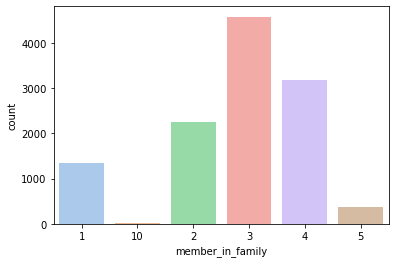

In [47]:
sns.countplot(x='member_in_family', data=df, palette='pastel')

<AxesSubplot:xlabel='preferred_device', ylabel='count'>

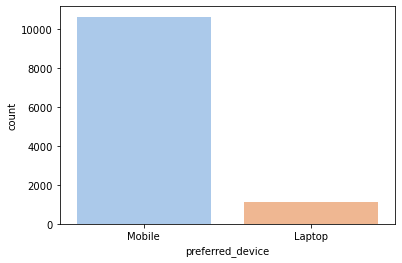

In [48]:
sns.countplot(x='preferred_device', data=df, palette='pastel')

<AxesSubplot:xlabel='preferred_location_type', ylabel='count'>

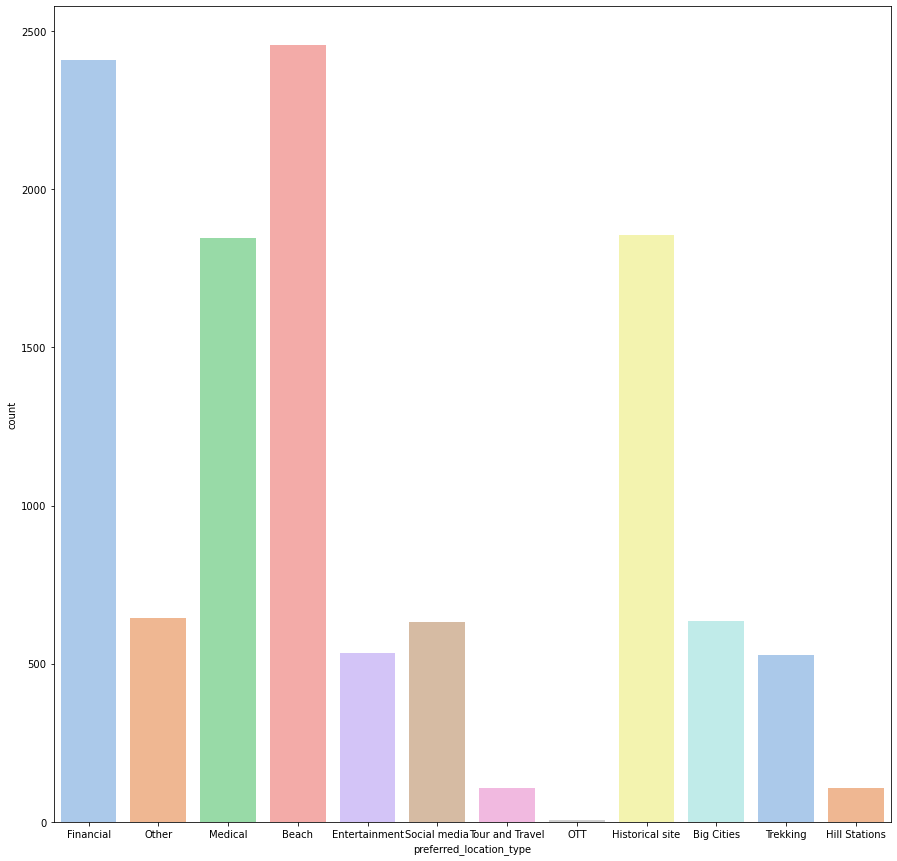

In [49]:
plt.figure(figsize=(15,15))
sns.countplot(x='preferred_location_type', data=df, palette='pastel')

In [50]:
#Bivariate Analysis

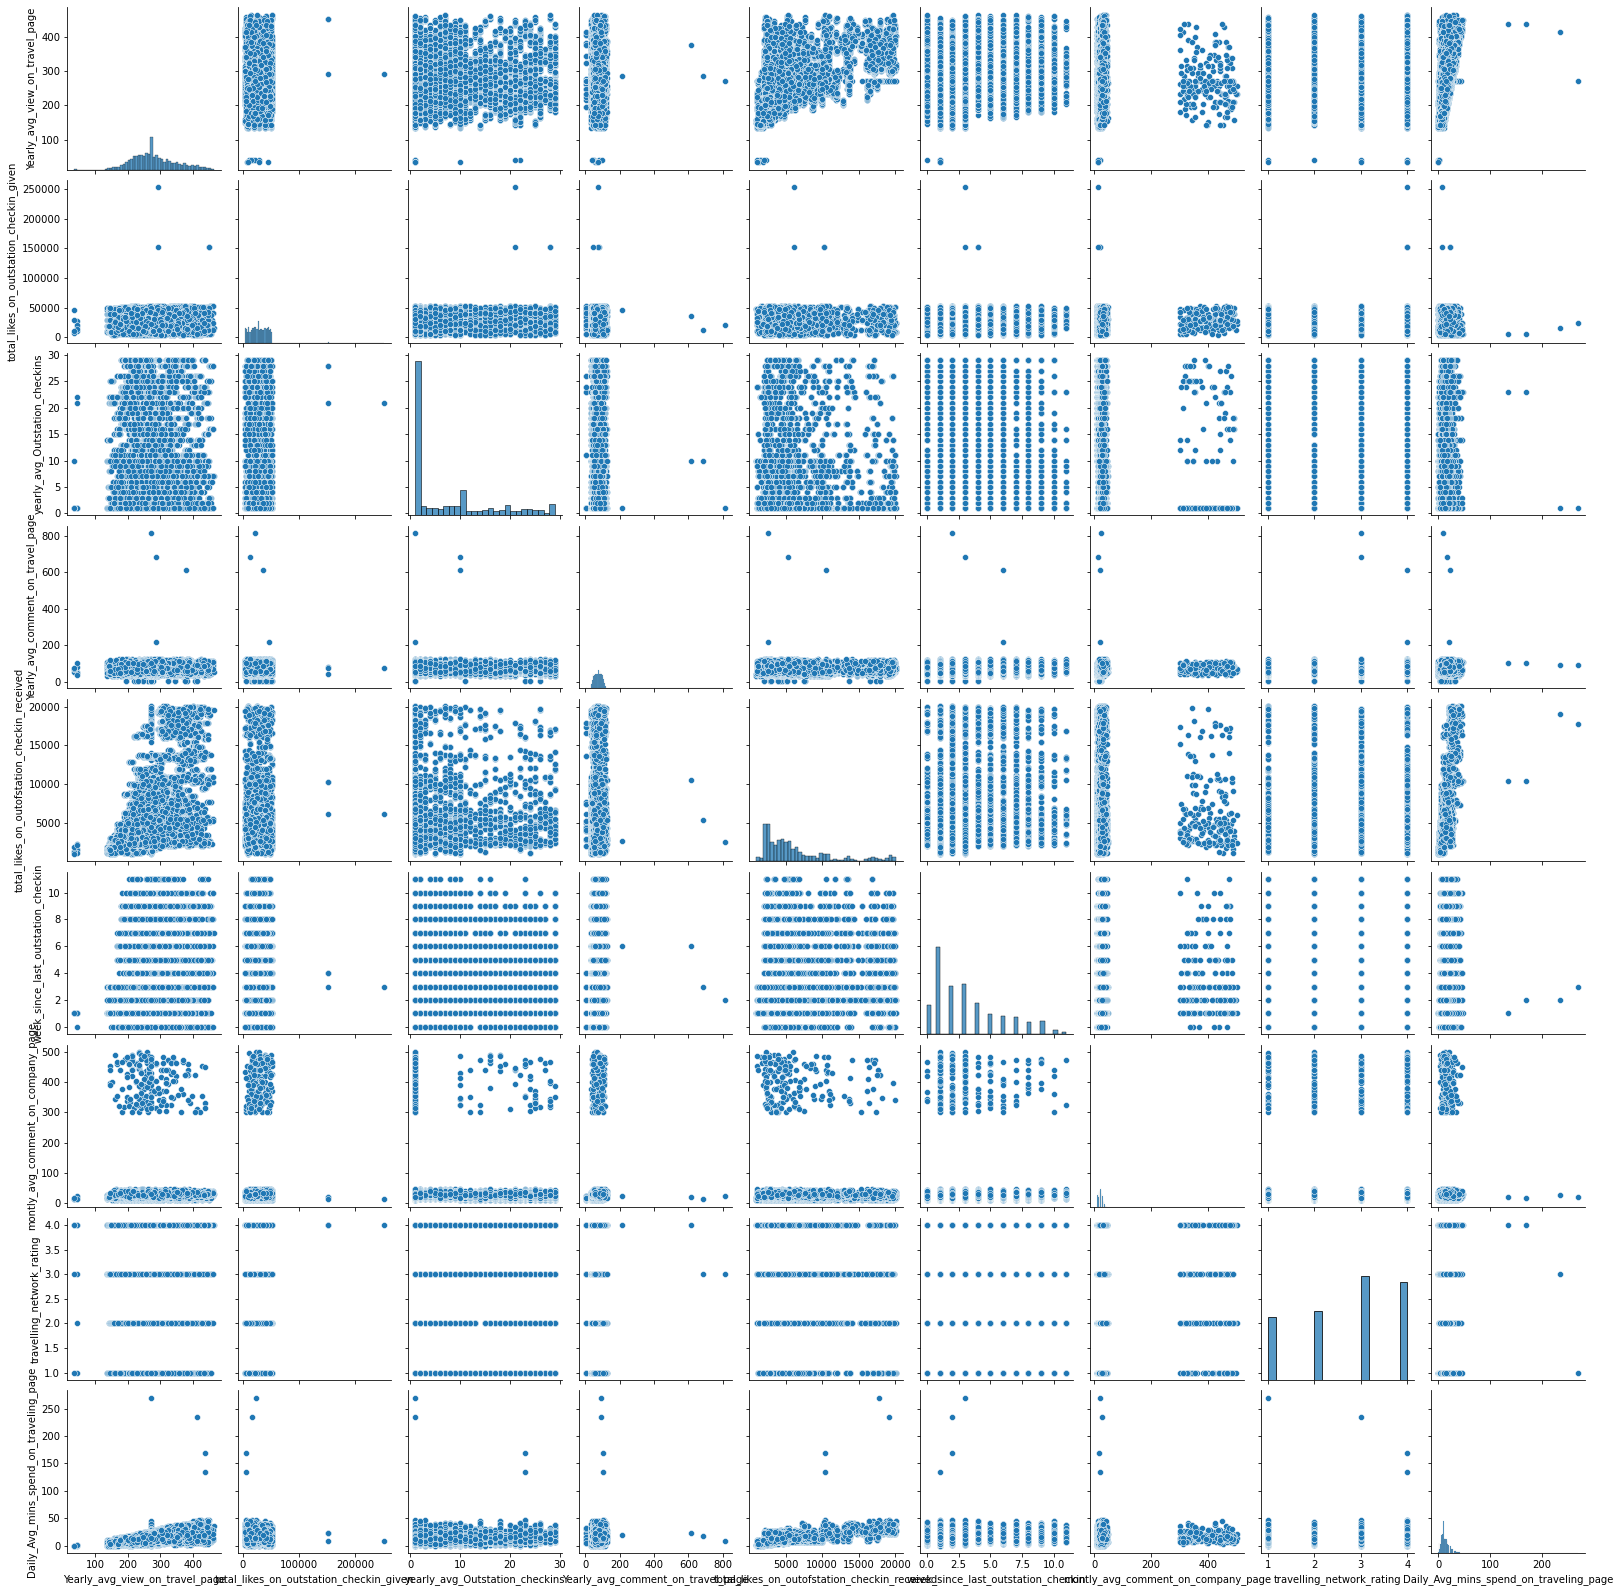

In [51]:
sns.pairplot(df)
plt.show()

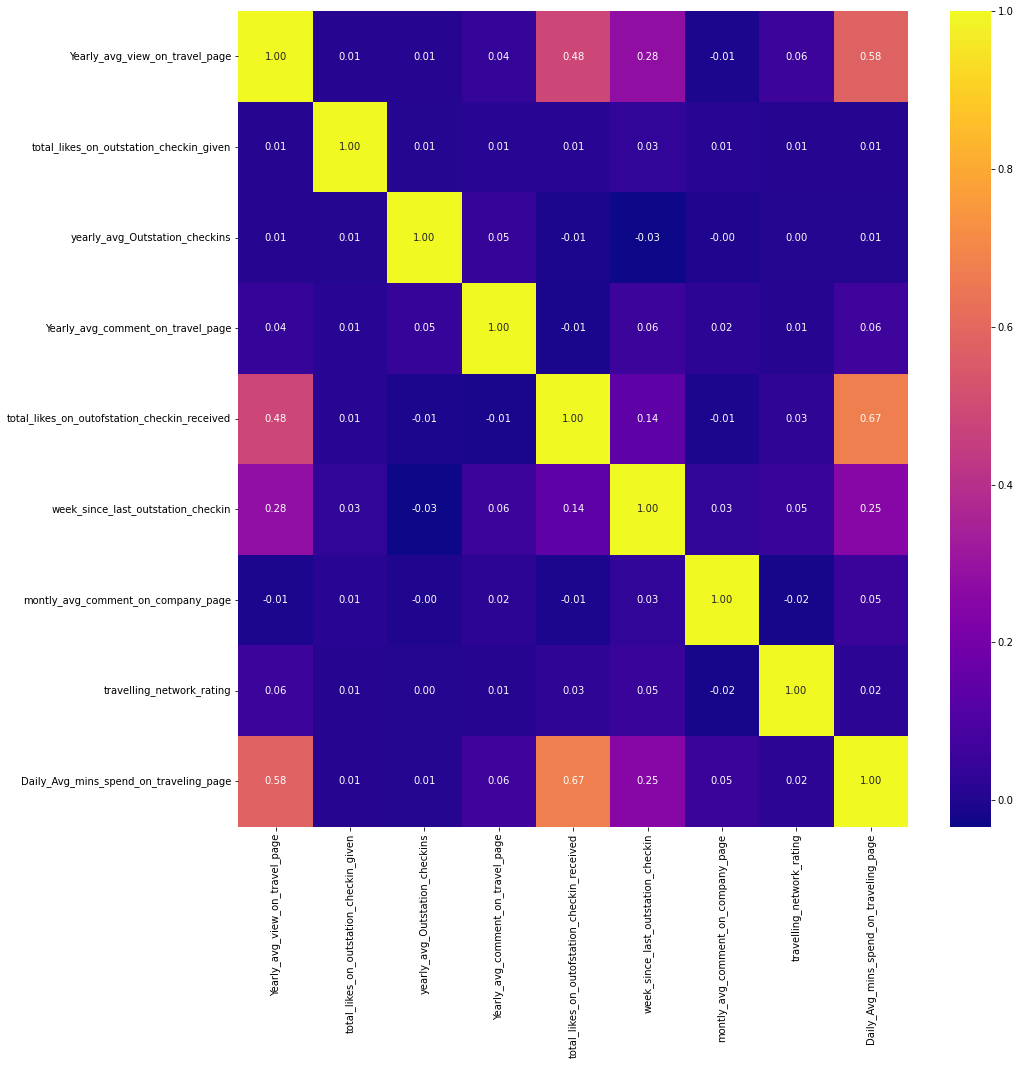

In [52]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,fmt=".2f", cmap='plasma');

In [53]:
#Multivariate Analysis

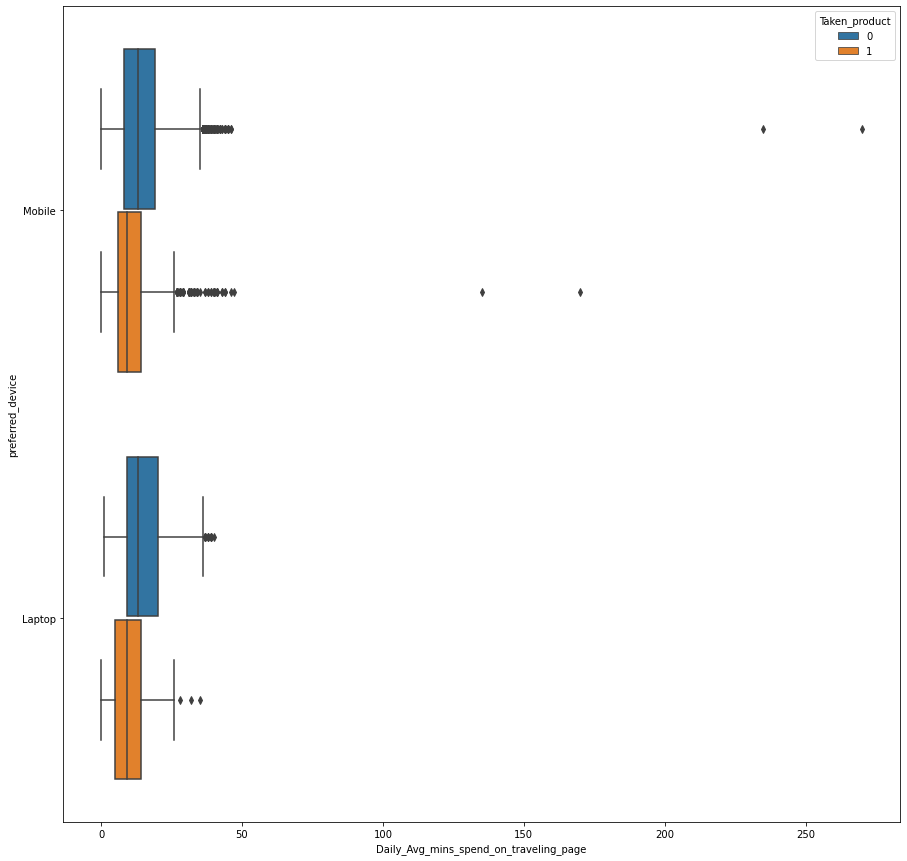

In [54]:
plt.figure(figsize=(15,15))
sns.boxplot(df['Daily_Avg_mins_spend_on_traveling_page'], df['preferred_device'], hue=df['Taken_product']);

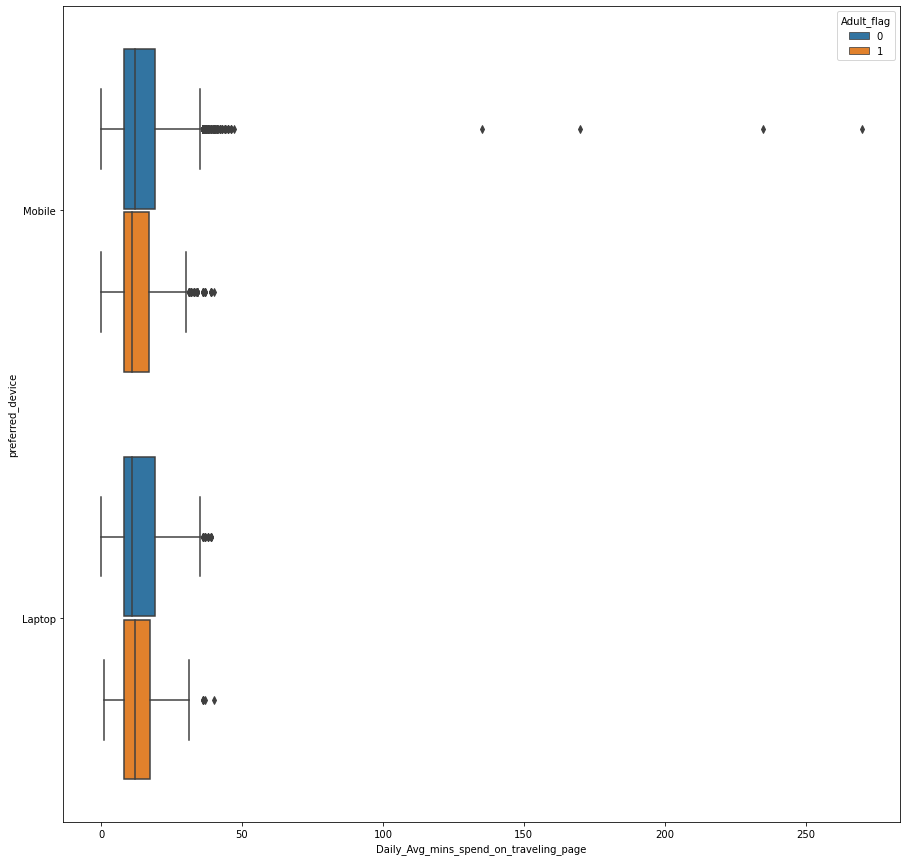

In [55]:
plt.figure(figsize=(15,15))
sns.boxplot(df['Daily_Avg_mins_spend_on_traveling_page'], df['preferred_device'], hue=df['Adult_flag']);

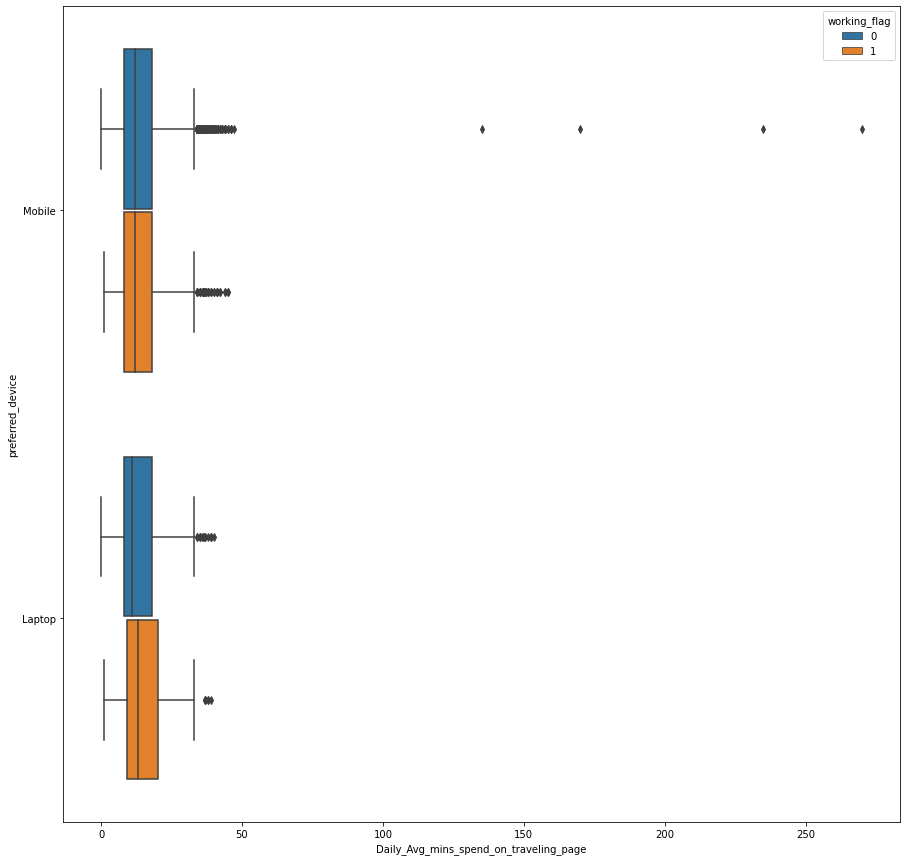

In [56]:
plt.figure(figsize=(15,15))
sns.boxplot(df['Daily_Avg_mins_spend_on_traveling_page'], df['preferred_device'], hue=df['working_flag']);

In [57]:
#outlier check and treatment

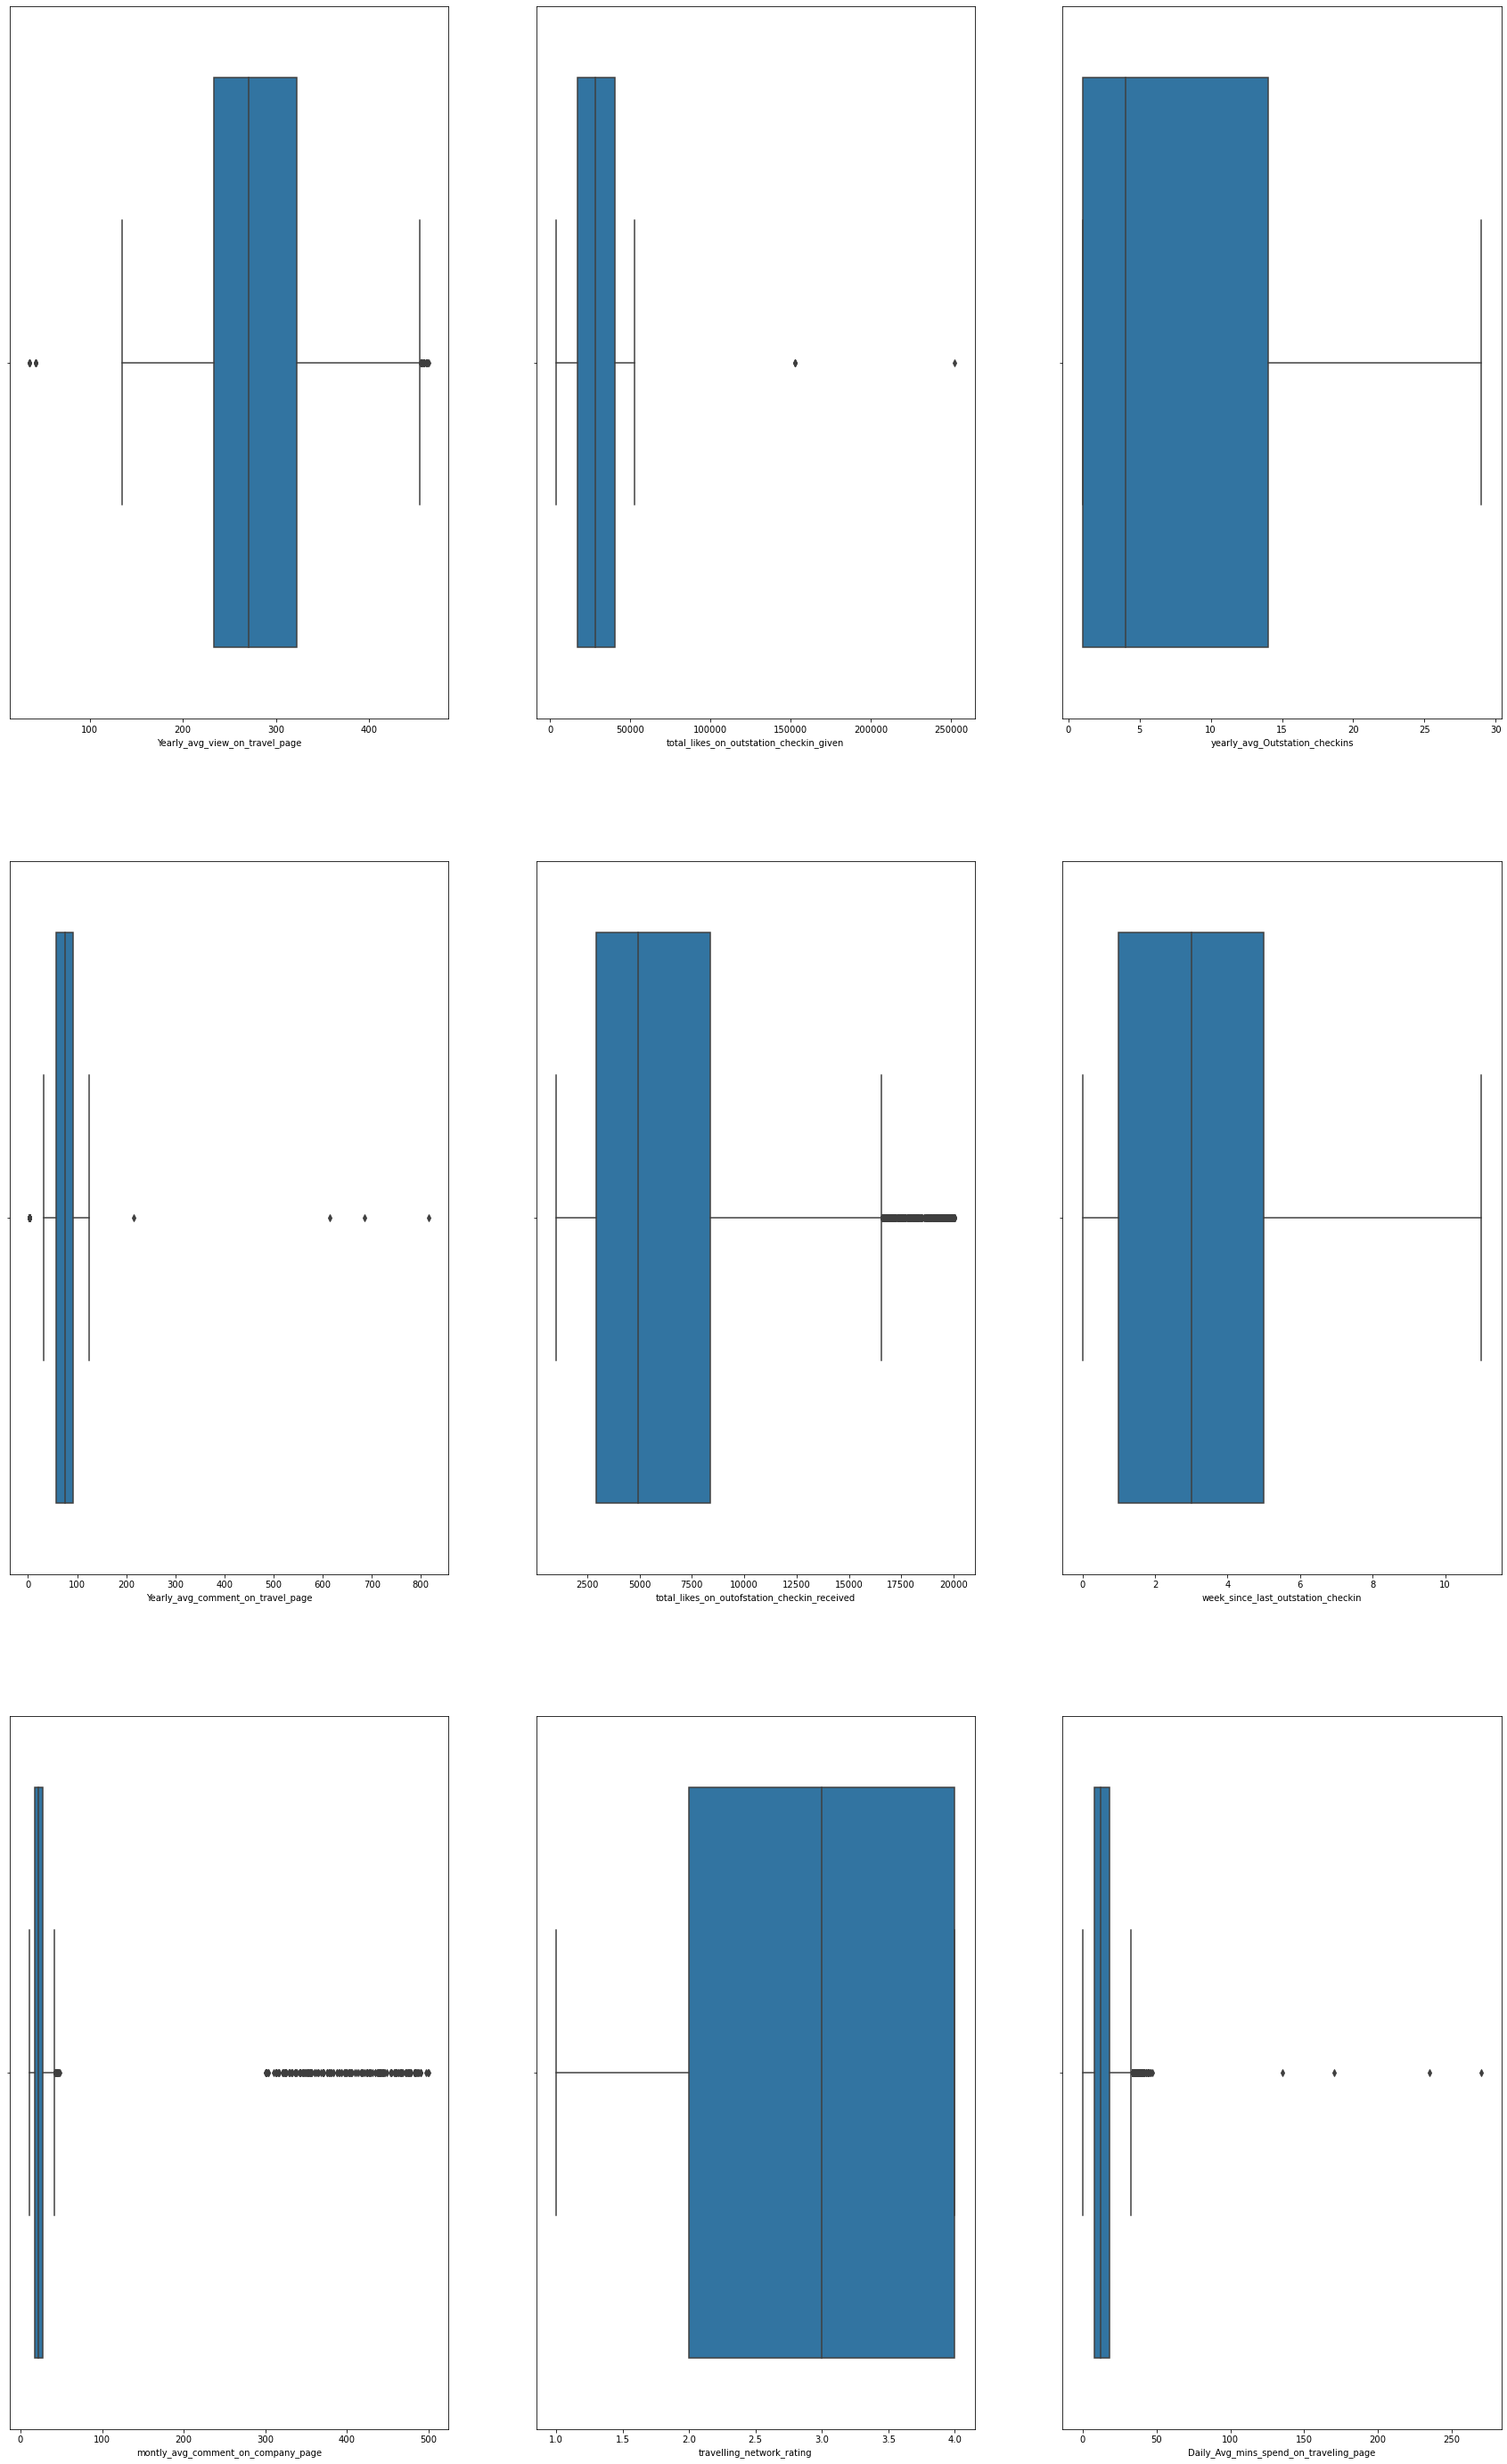

In [58]:
plt.figure(figsize=(30,50))

My_coulmns = ['Yearly_avg_view_on_travel_page', 'total_likes_on_outstation_checkin_given', 
                               'yearly_avg_Outstation_checkins', 'Yearly_avg_comment_on_travel_page', 
                               'total_likes_on_outofstation_checkin_received', 'week_since_last_outstation_checkin',
                               'montly_avg_comment_on_company_page', 'travelling_network_rating',
                               'Daily_Avg_mins_spend_on_traveling_page']
for i in range(0,9):
    plt.subplot(3,3,i+1)
    sns.boxplot(df[My_coulmns[i]])

In [59]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range 

In [60]:
list_num=['Yearly_avg_view_on_travel_page','total_likes_on_outstation_checkin_given','yearly_avg_Outstation_checkins',
          'Yearly_avg_comment_on_travel_page','total_likes_on_outofstation_checkin_received',
          'week_since_last_outstation_checkin','montly_avg_comment_on_company_page','travelling_network_rating',
          'Daily_Avg_mins_spend_on_traveling_page']
for i in list_num:
    LL, UL = remove_outlier(df[i])
    df[i]= np.where(df[i] > UL, UL, df[i])
    df[i]= np.where(df[i] < LL, LL, df[i])

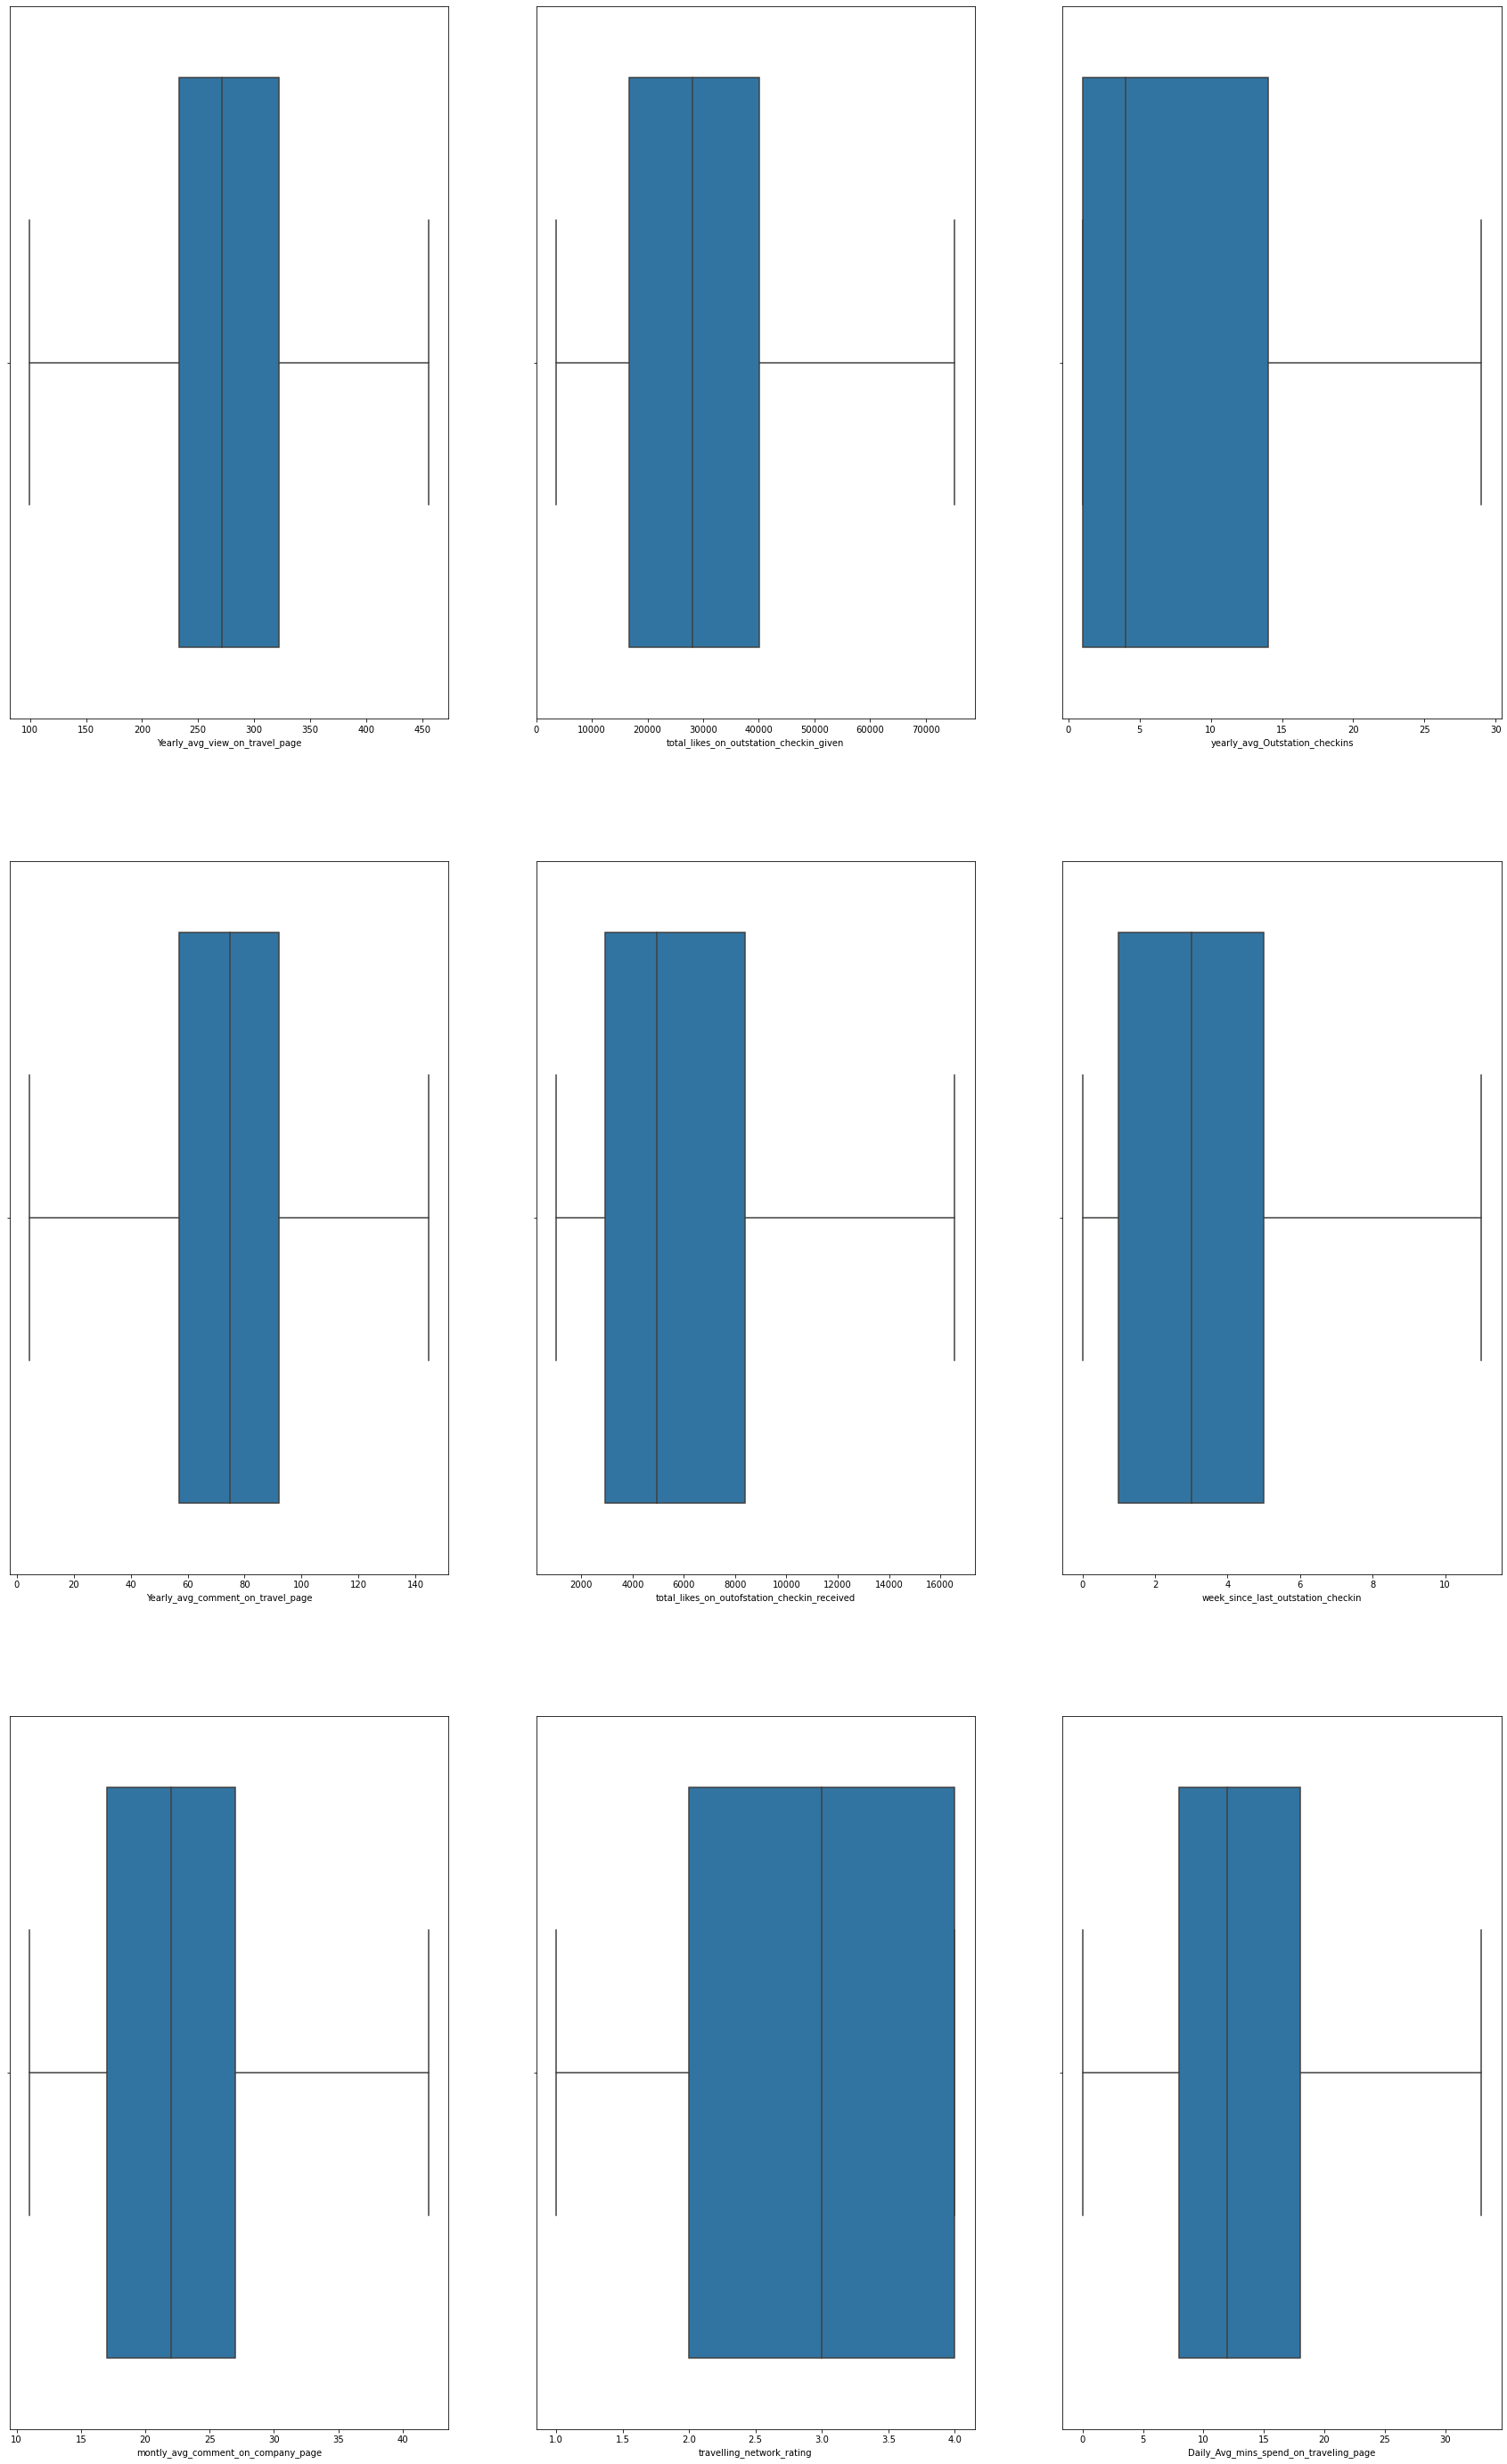

In [61]:
plt.figure(figsize=(30,50))

My_coulmns = ['Yearly_avg_view_on_travel_page', 'total_likes_on_outstation_checkin_given', 
                               'yearly_avg_Outstation_checkins', 'Yearly_avg_comment_on_travel_page', 
                               'total_likes_on_outofstation_checkin_received', 'week_since_last_outstation_checkin',
                               'montly_avg_comment_on_company_page', 'travelling_network_rating',
                               'Daily_Avg_mins_spend_on_traveling_page']
for i in range(0,9):
    plt.subplot(3,3,i+1)
    sns.boxplot(df[My_coulmns[i]])

In [62]:
# scaling and normalization

In [63]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Yearly_avg_view_on_travel_page,11760.0,280.385587,66.347859,99.5,233.00,271.0,322.00,455.50
total_likes_on_outstation_checkin_given,11760.0,28132.657058,13883.783884,3570.0,16697.25,28076.0,40115.25,75242.25
yearly_avg_Outstation_checkins,11760.0,8.176871,8.663686,1.0,1.00,4.0,14.00,29.00
Yearly_avg_comment_on_travel_page,11760.0,74.649320,21.526694,4.5,57.00,75.0,92.00,144.50
total_likes_on_outofstation_checkin_received,11760.0,6387.709439,4345.180379,1009.0,2940.75,4948.0,8393.25,16572.00
week_since_last_outstation_checkin,11760.0,3.203571,2.616365,0.0,1.00,3.0,5.00,11.00
montly_avg_comment_on_company_page,11760.0,22.854422,7.354454,11.0,17.00,22.0,27.00,42.00
travelling_network_rating,11760.0,2.712245,1.080887,1.0,2.00,3.0,4.00,4.00
Daily_Avg_mins_spend_on_traveling_page,11760.0,13.633673,7.980341,0.0,8.00,12.0,18.00,33.00


In [64]:
list_numeric= []
for i in df.columns:
    if df[i].dtype == 'int64' or df[i].dtype == 'float64':
        list_numeric.append(i)
print(list_numeric)

['Yearly_avg_view_on_travel_page', 'total_likes_on_outstation_checkin_given', 'yearly_avg_Outstation_checkins', 'Yearly_avg_comment_on_travel_page', 'total_likes_on_outofstation_checkin_received', 'week_since_last_outstation_checkin', 'montly_avg_comment_on_company_page', 'travelling_network_rating', 'Daily_Avg_mins_spend_on_traveling_page']


In [65]:
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
df1= pd.DataFrame(scale.fit_transform(df[list_numeric]), columns= list_numeric)
df1.head()

,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,travelling_network_rating,Daily_Avg_mins_spend_on_traveling_page
0,0.401152,0.751797,-0.828421,0.898954,-0.090842,1.833319,-1.611938,-1.584178,-0.705974
1,1.305515,-1.323014,-0.828421,-0.634092,-0.289462,-0.842262,0.019795,1.191438,-0.455347
2,-0.051030,1.434997,-0.828421,0.806042,-0.989117,1.068868,-1.068027,-0.658973,-0.831287
3,-0.503212,1.482897,-0.828421,-0.866371,-0.800624,-0.842262,-1.611938,0.266233,-0.705974
4,-1.181484,-0.536451,-0.828421,-1.609666,-0.671971,2.215545,-1.475960,1.191438,-0.956600


In [66]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Yearly_avg_view_on_travel_page,11760.0,-7.799883e-16,1.000043,-2.726437,-0.714230,-0.141466,0.627242,2.639450
total_likes_on_outstation_checkin_given,11760.0,3.301403e-17,1.000043,-1.769237,-0.823687,-0.004081,0.863101,3.393282
yearly_avg_Outstation_checkins,11760.0,4.188539e-15,1.000043,-0.828421,-0.828421,-0.482133,0.672159,2.403598
Yearly_avg_comment_on_travel_page,11760.0,-5.660438e-16,1.000043,-3.258852,-0.819915,0.016291,0.806042,3.244978
total_likes_on_outofstation_checkin_received,11760.0,-7.714917e-17,1.000043,-1.237909,-0.793317,-0.331349,0.461575,2.343913
week_since_last_outstation_checkin,11760.0,-8.924267e-16,1.000043,-1.224488,-0.842262,-0.077810,0.686642,2.979997
montly_avg_comment_on_company_page,11760.0,-1.224425e-14,1.000043,-1.611938,-0.796071,-0.116182,0.563707,2.603374
travelling_network_rating,11760.0,-1.930617e-16,1.000043,-1.584178,-0.658973,0.266233,1.191438,1.191438
Daily_Avg_mins_spend_on_traveling_page,11760.0,-4.843366e-16,1.000043,-1.708480,-0.705974,-0.204721,0.547159,2.426857


In [67]:
list_category= []
for i in df.columns:
    if df[i].dtype != 'int64' and df[i].dtype != 'float64':
        list_category.append(i)
print(list_category)

['Taken_product', 'preferred_device', 'member_in_family', 'preferred_location_type', 'following_company_page', 'working_flag', 'Adult_flag']


In [68]:
df2 = pd.DataFrame(df[list_category], columns= list_category)
df2.head()

,Taken_product,preferred_device,member_in_family,preferred_location_type,following_company_page,working_flag,Adult_flag
0,1,Mobile,2,Financial,1,0,0
1,0,Mobile,1,Financial,0,1,0
2,1,Mobile,2,Other,1,0,0
3,0,Mobile,4,Financial,1,0,0
4,0,Mobile,1,Medical,0,0,0


In [69]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Taken_product            11760 non-null  category
 1   preferred_device         11760 non-null  object  
 2   member_in_family         11760 non-null  category
 3   preferred_location_type  11760 non-null  object  
 4   following_company_page   11760 non-null  category
 5   working_flag             11760 non-null  category
 6   Adult_flag               11760 non-null  category
dtypes: category(5), object(2)
memory usage: 242.0+ KB


In [70]:
df_new = pd.concat([df1, df2], axis=1) 

In [71]:
df_new.head().T

,0,1,2,3,4
Yearly_avg_view_on_travel_page,0.401152,1.305515,-0.05103,-0.503212,-1.181484
total_likes_on_outstation_checkin_given,0.751797,-1.323014,1.434997,1.482897,-0.536451
yearly_avg_Outstation_checkins,-0.828421,-0.828421,-0.828421,-0.828421,-0.828421
Yearly_avg_comment_on_travel_page,0.898954,-0.634092,0.806042,-0.866371,-1.609666
total_likes_on_outofstation_checkin_received,-0.090842,-0.289462,-0.989117,-0.800624,-0.671971
week_since_last_outstation_checkin,1.833319,-0.842262,1.068868,-0.842262,2.215545
montly_avg_comment_on_company_page,-1.611938,0.019795,-1.068027,-1.611938,-1.47596
travelling_network_rating,-1.584178,1.191438,-0.658973,0.266233,1.191438
Daily_Avg_mins_spend_on_traveling_page,-0.705974,-0.455347,-0.831287,-0.705974,-0.9566
Taken_product,1,0,1,0,0


In [72]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   Yearly_avg_view_on_travel_page                11760 non-null  float64 
 1   total_likes_on_outstation_checkin_given       11760 non-null  float64 
 2   yearly_avg_Outstation_checkins                11760 non-null  float64 
 3   Yearly_avg_comment_on_travel_page             11760 non-null  float64 
 4   total_likes_on_outofstation_checkin_received  11760 non-null  float64 
 5   week_since_last_outstation_checkin            11760 non-null  float64 
 6   montly_avg_comment_on_company_page            11760 non-null  float64 
 7   travelling_network_rating                     11760 non-null  float64 
 8   Daily_Avg_mins_spend_on_traveling_page        11760 non-null  float64 
 9   Taken_product                                 1176

In [73]:
# balancing

In [74]:
list_numeric.append('Taken_product')

In [75]:
default = pd.DataFrame(df[list_numeric], columns= list_numeric)
default.head()

,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,travelling_network_rating,Daily_Avg_mins_spend_on_traveling_page,Taken_product
0,307.0,38570.0,1.0,94.0,5993.0,8.0,11.0,1.0,8.0,1
1,367.0,9765.0,1.0,61.0,5130.0,1.0,23.0,4.0,10.0,0
2,277.0,48055.0,1.0,92.0,2090.0,6.0,15.0,2.0,7.0,1
3,247.0,48720.0,1.0,56.0,2909.0,1.0,11.0,3.0,8.0,0
4,202.0,20685.0,1.0,40.0,3468.0,9.0,12.0,4.0,6.0,0


In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X = default.drop('Taken_product', axis = 1)
y = default['Taken_product']

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 21, stratify = y)

In [79]:
print(X_train.shape)
print(X_test.shape)

(8232, 9)
(3528, 9)


In [80]:
print(y_train.value_counts(normalize = True).round(2))
print(' ')
print(y_test.value_counts(normalize = True).round(2))

0    0.84
1    0.16
Name: Taken_product, dtype: float64
 
0    0.84
1    0.16
Name: Taken_product, dtype: float64


In [81]:
from imblearn.over_sampling import SMOTE 

In [82]:
sm = SMOTE(random_state=33, sampling_strategy = 0.75)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [83]:
Default_smote = pd.concat([X_res, y_res], axis = 1)

In [84]:
default.groupby('Taken_product').mean().T

Taken_product,0,1
Yearly_avg_view_on_travel_page,284.726936,257.799578
total_likes_on_outstation_checkin_given,28462.161294,26418.400844
yearly_avg_Outstation_checkins,7.888686,9.676160
Yearly_avg_comment_on_travel_page,74.678629,74.496835
total_likes_on_outofstation_checkin_received,6701.655008,4754.397679
week_since_last_outstation_checkin,3.152271,3.470464
montly_avg_comment_on_company_page,22.879055,22.726266
travelling_network_rating,2.733982,2.599156
Daily_Avg_mins_spend_on_traveling_page,14.213504,10.617089


In [85]:
Default_smote.groupby('Taken_product').mean().T

Taken_product,0,1
Yearly_avg_view_on_travel_page,283.670963,261.073992
total_likes_on_outstation_checkin_given,28559.733671,26343.834493
yearly_avg_Outstation_checkins,7.994352,9.561413
Yearly_avg_comment_on_travel_page,74.590659,74.894421
total_likes_on_outofstation_checkin_received,6679.878928,4779.736250
week_since_last_outstation_checkin,3.137871,3.610214
montly_avg_comment_on_company_page,22.874873,22.859643
travelling_network_rating,2.732657,2.637072
Daily_Avg_mins_spend_on_traveling_page,14.128747,10.879310


In [86]:
from collections import Counter
sm = SMOTE(random_state=33, sampling_strategy = 0.75)

# fit predictor and target variable
X_res, y_res = sm.fit_resample(X_train, y_train)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_res))

Original dataset shape Counter({'0': 9864, '1': 1896})
Resample dataset shape Counter({'0': 6905, '1': 5178})


In [87]:
# clustering

In [88]:
X = StandardScaler()

In [89]:
scaled_df = X.fit_transform(default)

In [90]:
scaled_df

array([[ 0.40115152,  0.75179698, -0.82842061, ..., -1.58417824,
        -0.70597395,  2.28090588],
       [ 1.30551456, -1.32301383, -0.82842061, ...,  1.19143799,
        -0.45534744, -0.4384223 ],
       [-0.05102999,  1.43499713, -0.82842061, ..., -0.65897283,
        -0.8312872 ,  2.28090588],
       ...,
       [-1.00061118, -1.63180445, -0.48213294, ..., -0.65897283,
        -0.20472094, -0.4384223 ],
       [ 1.53160532,  0.55594867, -0.71299138, ...,  1.19143799,
         0.79778509, -0.4384223 ],
       [-0.15653901, -0.43993171, -0.02041605, ..., -1.58417824,
         0.04590557, -0.4384223 ]])

In [91]:
wardlink = linkage(scaled_df, method = 'ward')

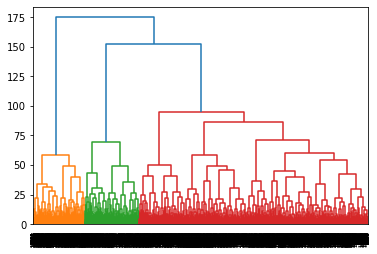

In [92]:
dend = dendrogram(wardlink)

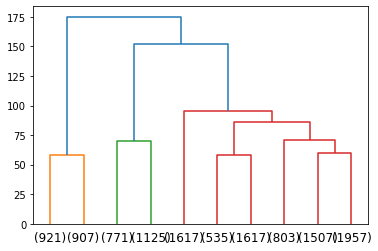

In [93]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

In [94]:
clusters = fcluster(wardlink, 100, criterion='distance')
clusters

array([2, 3, 2, ..., 3, 1, 3], dtype=int32)

In [95]:
df_h = df_new

In [96]:
df_h['clusters'] = clusters

In [97]:
df_h.head()

,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,travelling_network_rating,Daily_Avg_mins_spend_on_traveling_page,Taken_product,preferred_device,member_in_family,preferred_location_type,following_company_page,working_flag,Adult_flag,clusters
0,0.401152,0.751797,-0.828421,0.898954,-0.090842,1.833319,-1.611938,-1.584178,-0.705974,1,Mobile,2,Financial,1,0,0,2
1,1.305515,-1.323014,-0.828421,-0.634092,-0.289462,-0.842262,0.019795,1.191438,-0.455347,0,Mobile,1,Financial,0,1,0,3
2,-0.051030,1.434997,-0.828421,0.806042,-0.989117,1.068868,-1.068027,-0.658973,-0.831287,1,Mobile,2,Other,1,0,0,2
3,-0.503212,1.482897,-0.828421,-0.866371,-0.800624,-0.842262,-1.611938,0.266233,-0.705974,0,Mobile,4,Financial,1,0,0,3
4,-1.181484,-0.536451,-0.828421,-1.609666,-0.671971,2.215545,-1.475960,1.191438,-0.956600,0,Mobile,1,Medical,0,0,0,3


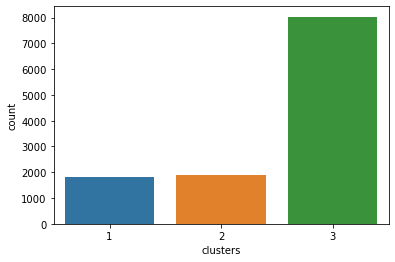

In [98]:
sns.countplot(df_h['clusters']);

In [99]:
df_h.clusters.value_counts().sort_index()

1    1828
2    1896
3    8036
Name: clusters, dtype: int64

In [100]:
aggdata=df_h.iloc[:,:].groupby('clusters').mean()
aggdata['Freq']=df_h.clusters.value_counts().sort_index()
aggdata.T

clusters,1,2,3
Yearly_avg_view_on_travel_page,1.207929,-0.340433,-0.194454
total_likes_on_outstation_checkin_given,0.123952,-0.123477,0.000937
yearly_avg_Outstation_checkins,0.021323,0.173062,-0.045682
Yearly_avg_comment_on_travel_page,0.107920,-0.007084,-0.022878
total_likes_on_outofstation_checkin_received,1.667517,-0.375906,-0.290630
week_since_last_outstation_checkin,0.480683,0.102013,-0.133413
montly_avg_comment_on_company_page,0.050442,-0.017426,-0.007363
travelling_network_rating,0.138688,-0.104630,-0.006862
Daily_Avg_mins_spend_on_traveling_page,1.539039,-0.378018,-0.260906
Freq,1828.000000,1896.000000,8036.000000


In [101]:
df_h.to_csv('hc.csv')

# -------------------------------------------------------------------------------------------

In [102]:
k_means = KMeans(n_clusters = 1)
k_means.fit(scaled_df)
k_means.inertia_

117600.00000000023

In [103]:
k_means = KMeans(n_clusters = 2)
k_means.fit(scaled_df)
k_means.inertia_

98745.36066039788

In [104]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df)
k_means.inertia_

88230.19152035986

In [105]:
k_means = KMeans(n_clusters = 4)
k_means.fit(scaled_df)
k_means.inertia_

81330.31953729756

In [106]:
k_means = KMeans(n_clusters = 5)
k_means.fit(scaled_df)
k_means.inertia_

76876.52508838585

In [107]:
k_means = KMeans(n_clusters = 6)
k_means.fit(scaled_df)
k_means.inertia_

72986.96543439571

In [108]:
wss = [] 

In [109]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [110]:
wss

[117600.00000000023,
 98744.56611666392,
 88230.17972869684,
 81330.52371787466,
 76763.44825823513,
 72987.14064926437,
 70199.66672389962,
 68156.06576581621,
 66158.74654199957,
 64473.097249583196]

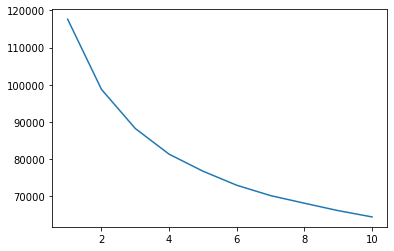

In [111]:
plt.plot(range(1,11), wss)

In [112]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df)
labels = k_means.labels_

In [113]:
df_k = df.copy()

In [114]:
df_k.head()

,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,1,307.0,Mobile,38570.0,1.0,2,Financial,94.0,5993.0,8.0,1,11.0,0,1.0,0,8.0
1,0,367.0,Mobile,9765.0,1.0,1,Financial,61.0,5130.0,1.0,0,23.0,1,4.0,0,10.0
2,1,277.0,Mobile,48055.0,1.0,2,Other,92.0,2090.0,6.0,1,15.0,0,2.0,0,7.0
3,0,247.0,Mobile,48720.0,1.0,4,Financial,56.0,2909.0,1.0,1,11.0,0,3.0,0,8.0
4,0,202.0,Mobile,20685.0,1.0,1,Medical,40.0,3468.0,9.0,0,12.0,0,4.0,0,6.0


In [115]:
df_k['preferred_device'].unique()

array(['Mobile', 'Laptop'], dtype=object)

In [116]:
df_k.shape

(11760, 16)

In [117]:
laptop=df_k.loc[df_k.preferred_device=='Laptop']

In [118]:
laptop.shape

(1108, 16)

In [119]:
laptop.to_csv('Laptop Dataset.csv', index=False)

In [120]:
mobile=df_k.loc[df_k.preferred_device=='Mobile']

In [121]:
mobile.to_csv('Mobile Dataset.csv', index=False)

In [122]:
mobile.shape

(10652, 16)

In [123]:
df_k["Clus_kmeans"] = labels
df_k.head()

,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page,Clus_kmeans
0,1,307.0,Mobile,38570.0,1.0,2,Financial,94.0,5993.0,8.0,1,11.0,0,1.0,0,8.0,0
1,0,367.0,Mobile,9765.0,1.0,1,Financial,61.0,5130.0,1.0,0,23.0,1,4.0,0,10.0,1
2,1,277.0,Mobile,48055.0,1.0,2,Other,92.0,2090.0,6.0,1,15.0,0,2.0,0,7.0,0
3,0,247.0,Mobile,48720.0,1.0,4,Financial,56.0,2909.0,1.0,1,11.0,0,3.0,0,8.0,1
4,0,202.0,Mobile,20685.0,1.0,1,Medical,40.0,3468.0,9.0,0,12.0,0,4.0,0,6.0,1


In [124]:
silhouette_score(scaled_df,labels)

0.18431838342228624

In [125]:
sil_width = silhouette_samples(scaled_df,labels)

In [126]:
df_k["sil_width"] = sil_width
df_k.head(5)

,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page,Clus_kmeans,sil_width
0,1,307.0,Mobile,38570.0,1.0,2,Financial,94.0,5993.0,8.0,1,11.0,0,1.0,0,8.0,0,0.147842
1,0,367.0,Mobile,9765.0,1.0,1,Financial,61.0,5130.0,1.0,0,23.0,1,4.0,0,10.0,1,0.181546
2,1,277.0,Mobile,48055.0,1.0,2,Other,92.0,2090.0,6.0,1,15.0,0,2.0,0,7.0,0,0.174823
3,0,247.0,Mobile,48720.0,1.0,4,Financial,56.0,2909.0,1.0,1,11.0,0,3.0,0,8.0,1,0.248563
4,0,202.0,Mobile,20685.0,1.0,1,Medical,40.0,3468.0,9.0,0,12.0,0,4.0,0,6.0,1,0.148355


In [127]:
silhouette_samples(scaled_df,labels).min()

-0.06045571513547656

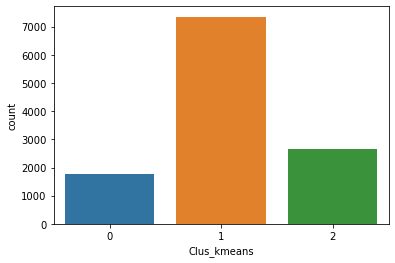

In [128]:
sns.countplot(df_k['Clus_kmeans']);

In [129]:
df_k[df_k['Clus_kmeans'] == 0].shape

(1758, 18)

In [130]:
df_k[df_k['Clus_kmeans'] == 1].shape

(7348, 18)

In [131]:
df_k[df_k['Clus_kmeans'] == 2].shape

(2654, 18)

In [132]:
df_k.Clus_kmeans.value_counts().sort_index()

0    1758
1    7348
2    2654
Name: Clus_kmeans, dtype: int64

In [133]:
clust_profile=df_k.groupby('Clus_kmeans').mean()
clust_profile['freq']=df_k.Clus_kmeans.value_counts().sort_index()
clust_profile.T

Clus_kmeans,0,1,2
Yearly_avg_view_on_travel_page,248.883959,261.529872,353.457046
total_likes_on_outstation_checkin_given,26359.131399,28431.169230,28480.957988
yearly_avg_Outstation_checkins,9.828214,7.842406,8.009043
Yearly_avg_comment_on_travel_page,73.960751,73.995985,76.914280
total_likes_on_outofstation_checkin_received,4129.365757,4763.317637,12381.002261
week_since_last_outstation_checkin,3.347554,2.717202,4.454785
montly_avg_comment_on_company_page,22.782139,22.517692,23.834589
travelling_network_rating,2.549488,2.712167,2.820271
Daily_Avg_mins_spend_on_traveling_page,9.266780,10.669842,24.732102
sil_width,0.174043,0.200609,0.146023


In [134]:
df_k.to_csv('km.csv')